In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [7]:
cleaned_df = pd.read_csv('Data/Cleaned_Modifications.tsv', sep = '\t')
cleaned_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,scannum,Peptide,Observed Modifications,Protein ID,Gene,Delta Mass,Organism,best_locs
0,0,0,0,2397,AEATHPAPAESGNGAEGGK,Xlink:EGS[115](115.026943),A5FZF9,secB,115.0261,Acidiphilium_cryptum,AEATHPAPAESGNGAEGGk
1,1,1,1,2415,ASGAGGQHVNKTESAVR,Methyl(14.015650),A5FX99,prfA,14.0112,Acidiphilium_cryptum,ASGAggqHVNKTESAVR
2,5,6,6,2857,ASGAGGQHVNKTESAIR,Methyl(14.015650),A5FZ59,prfB,14.0170,Acidiphilium_cryptum,ASGAggqHVNKTESAIR
3,6,7,7,2883,ASGAGGQHVNKTESAIR,Methyl(14.015650),A5FZ59,prfB,14.0188,Acidiphilium_cryptum,ASGAggqHVNKTESAIR
4,9,13,13,4828,SHGDLSENAEYHSAR,Carboxy->Thiocarboxy(15.977156),A5FWZ7,greA,15.9849,Acidiphilium_cryptum,SHGDLSENAEyHSAR
...,...,...,...,...,...,...,...,...,...,...,...
26914,62464,102697,102697,38192,QMLLEAVADVDDALMEK,Ammonia-loss(-17.026549),A0A1R0IL53,fusA,-17.0240,Sulfobacillus_thermosulfidooxidans,qmLLEAVADVDDALMEK
26915,62465,102698,102698,38226,NMITGAAQMDGAILVVSAADGPMPQTR,Label:2H(3)+Oxidation(19.013745),A0A1R0IKZ6,tuf,19.0210,Sulfobacillus_thermosulfidooxidans,NMITGAAQMDGAIlvvSAADGPMPQTR
26916,62470,102706,102706,38463,ISAFYAPASSLAEMVEAILKDER,Carboxy(43.989829),A0A2T2WPV9,mdh,43.9851,Sulfobacillus_thermosulfidooxidans,ISAFYAPASSLAEMVEAILKDER
26917,62474,102714,102714,38688,IDPIPLIGFAGAPFTLASYIIEGGPSK,Methyl:2H(3)13C(1)(18.037835),A0A2T2WVR2,hemE,18.0330,Sulfobacillus_thermosulfidooxidans,IDPIPLIGFAGAPFTLASYIIEGGPSK


In [9]:
delta_mass = []
mass_name = []
for modification in cleaned_df['Observed Modifications']:
    mods = re.split(',', modification)
    for mod in mods:
        pattern = pattern = r'\(\-?\d+\.\d+\)'
        mod_label = re.sub(pattern, '',  mod)
        mass_shift = re.search(pattern, mod)
        if not mass_shift:
            print(mod)
            continue
        mass_shift = mass_shift[0]
        mass_shift = mass_shift.replace('(', '')
        mass_shift = mass_shift.replace(')', '')
        mass_shift = float(mass_shift)
        delta_mass.append(mass_shift)
        mass_name.append(mod_label.strip())
observed_modification_df = pd.DataFrame({'Delta Mass': delta_mass, 'Observed Modification': mass_name})
observed_modification_df

,Delta Mass,Observed Modification
0,115.026943,Xlink:EGS[115]
1,14.015650,Methyl
2,14.015650,Methyl
3,14.015650,Methyl
4,15.977156,Carboxy->Thiocarboxy
...,...,...
34063,-17.026549,Ammonia-loss
34064,19.013745,Label:2H(3)+Oxidation
34065,43.989829,Carboxy
34066,18.037835,Methyl:2H(3)13C(1)


In [68]:
df = observed_modification_df[observed_modification_df['Delta Mass'] > 130]
df = pd.DataFrame(df.groupby('Delta Mass').size()).sort_values(0, ascending = False)
df = df[df[0] < 10]
df = df[df[0] > 5]
df['dm'] = df.index
df.sort_values('dm')

,0,dm
Delta Mass,,
139.072893,6,139.072893
140.094963,6,140.094963
144.042259,8,144.042259
144.099599,8,144.099599
162.125595,6,162.125595
213.111341,7,213.111341
242.019154,6,242.019154
258.115047,9,258.115047
317.158686,6,317.158686


In [69]:
masses = [-17.026549, 14.015650, 43.005814, 128.107539, 156.115030, 259.141973,298.193280, 428.191582, 486.251206]

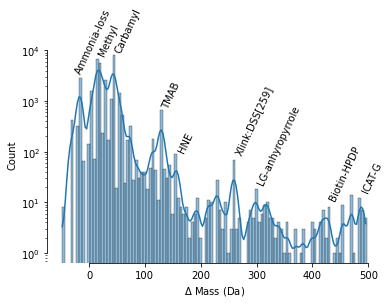

In [72]:
sns.histplot(observed_modification_df, x = 'Delta Mass', kde = True, log_scale = (False, True), binwidth = 5)
sns.despine(trim = True)
plt.xlabel(r'$\Delta$' + ' Mass (Da)')
plt.xlim = (1, 10^6)
for mass in masses:
    x = mass 
    y = sum(observed_modification_df['Delta Mass'] == mass)
    if x == -17.026549:
        y += 1500
        x -= 10
    elif x == 14.015650:
        y += 5000
    elif x == 43.005814:
        y += 5000
    elif x == 128.107539:
        y += 400
    elif x == 156.115030:
        y += 30
    elif x == 259.141973:
        y += 30
    elif x == 298.193280:
        y += 10
    elif x == 486.251206:
        y += 5
    elif x == 428.191582:
        y += 3
    z = list(observed_modification_df[observed_modification_df['Delta Mass'] == mass]['Observed Modification'])[0]
    plt.text(x = x, y = y, s = z, color = 'black', rotation = 65)
plt.savefig('Figures/Figure 2) Histogram of PTM Masses.png', bbox_inches = 'tight')
plt.show()